# **Linear Regression 실습**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021) #???

# **1. Univariate Regression**

1.1 Sample Data\
강의에서 예시로 사용중인 데이터를 생성합니다.


In [5]:
X = np.array([1,2,3,4])
y = np.array([2,1,4,3])

Plot 으로 그려보겠습니다.

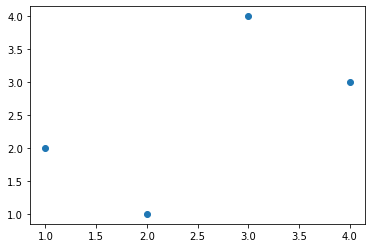

In [6]:
plt.scatter(X,y)

1.2 Data 변환
scikit-learn에서 모델 학습을 위한 데이터는 (n, c) 형태로 되어 있어야 함


*   n은 데이터의 개수를 의미
*   c는 feature 개수를 의미

우리가 사용하는 데이터는 4개의 데이터와 1개의 feature로 이루어져 있음


In [7]:
X

array([1, 2, 3, 4])

In [8]:
X.shape

(4,)

In [9]:
data = X.reshape(-1,1) #???

In [10]:
data

array([[1],
       [2],
       [3],
       [4]])

1.3 Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [56]:
# LinearRegression을 model 변수에 선언
model = LinearRegression()

1.3.1 학습하기\
scikit-learn 패키지의 LinearRegression을 이용해 선형 회귀 모델을 생성\
fit 함수 통해서 model 학습


```
# model.fit(X=...,y=...)
```

x는 학습에 사용할 데이터를 y는 학습에 사용할 정답 입니다.

In [17]:
model.fit(X=data, y=y)
# model.fit(data,y)

LinearRegression()

1.3.2 모델의 식 확인

bias, 편향 먼저 확인\
sklearn 에서는 intercept로 확인할 수 있음

In [19]:
model.intercept_

1.0000000000000004

In [21]:
# 회귀게수 확인
model.coef_

# y = 1+0.6 회귀선 예측 가능

array([0.6])

1.3.3 예측하기


In [23]:
pred = model.predict(data)

In [24]:
pred

array([1.6, 2.2, 2.8, 3.4])

1.4 회귀선을 Plot으로 표현하기

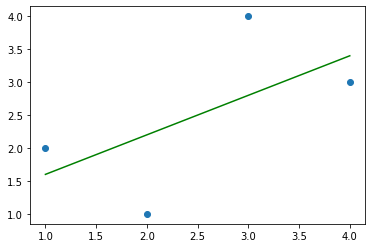

In [27]:
plt.scatter(X,y)
plt.plot(X, pred, color = 'green')
# 파란점은 자기고 있는데이터, 초록선은 예측하는 회귀선

# **2. Multivariate Regression**

2.1 Sample Data\
Multivariate Regression에서 사용할 데이터를 생성하고 학습한 회귀식과 비교

In [28]:
bias = 1
beta = np.array([2,3,4,5]).reshape(4,1)
noise = np.random.randn(100,1)

In [30]:
X = np.random.randn(100, 4)
y = bias + X.dot(beta)
y_with_noise = y + noise

In [31]:
X[:10]

array([[ 0.16485133,  0.4443254 , -0.34349934, -0.48812377],
       [-0.60445985, -0.72321797,  0.26184428, -0.40424619],
       [-0.51761993, -2.13187529, -0.63013353,  0.25704767],
       [ 1.37077615,  1.71038234, -0.29680754, -0.95314827],
       [ 0.10645787,  0.402295  ,  1.08828507,  0.98909523],
       [ 1.08008362, -0.71583989, -0.73240449,  0.60224466],
       [-0.23652914,  2.90796314,  1.04894104,  2.40895558],
       [ 1.32261009,  0.52924783,  0.21490651,  1.58655878],
       [-0.22493034,  0.35284928, -0.09853375,  0.19143512],
       [-0.46717167, -0.78954719, -1.41015172,  0.45243316]])

In [32]:
y[:10]

array([[-1.15193731],
       [-3.35242744],
       [-7.66616148],
       [ 2.91972784],
       [11.71841717],
       [ 1.09425289],
       [25.49137321],
       [14.0253836 ],
       [ 2.17172778],
       [-5.68142599]])

2.2 Multivariate Regression

In [33]:
model = LinearRegression()
model.fit(X,y_with_noise)

LinearRegression()

2.3 회귀식 확인

In [34]:
model.intercept_

array([1.13288074])

In [35]:
model.coef_

array([[2.0044348 , 3.0267574 , 4.1070518 , 5.03333809]])

워래 식과 비교한 결과 편향은 잘 맞추지 못함.\
다만, 회귀계수 정확하게 예측

2.4 통계적인 방법
이번엔 통계적 방법으로 회귀식을 계산

In [37]:
bias_X = np.array([1]*len(X)).reshape(-1,1)
stat_X = np.hstack([bias_X, X])
X_X_transpose = stat_X.transpose().dot(stat_X)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose)

In [39]:
stat_beta = X_X_transpose_inverse.dot(stat_X.transpose()).dot(y_with_noise)

In [40]:
stat_beta # 구했던 값과 같은값이 나옴

array([[1.13288074],
       [2.0044348 ],
       [3.0267574 ],
       [4.1070518 ],
       [5.03333809]])

# **3. Polynomial Regression**

3.1 Sample data

In [46]:
# 비선형 데이터 생성
bias = 1
beta = np.array([2,3]).reshape(2,1)
noise = np.random.randn(100,1)

In [47]:
X = np.random.randn(100,1)
X_poly = np.hstack([X, X**2])

In [50]:
X_poly[:10]

array([[-1.76032731e+00,  3.09875222e+00],
       [ 1.16610305e+00,  1.35979633e+00],
       [ 4.91710199e-01,  2.41778920e-01],
       [-8.02142511e-01,  6.43432607e-01],
       [ 6.24904809e-01,  3.90506020e-01],
       [ 1.43160874e-01,  2.04950357e-02],
       [-3.36336888e-01,  1.13122502e-01],
       [-3.23460700e-01,  1.04626825e-01],
       [ 1.30698158e+00,  1.70820084e+00],
       [-2.83035916e-02,  8.01093296e-04]])

In [48]:
y = bias + X_poly.dot(beta)
y_with_noise = y + noise

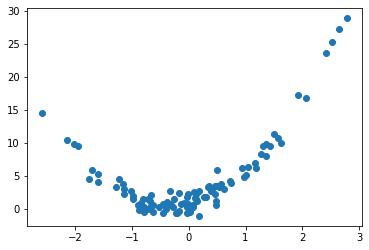

In [49]:
plt.scatter(X, y_with_noise)

3.2 Polynomial Regression

3.2.1 학습하기
 

In [51]:
model = LinearRegression()
model.fit(X_poly, y_with_noise)


LinearRegression()

3.2.2 회귀식 확인하기

In [52]:
model.intercept_

array([0.96501686])

In [53]:
model.coef_

array([[2.05641242, 2.9530699 ]])

3.2.3 예측하기

In [54]:
pred = model.predict(X_poly)

3.3 예측값 Plot으로 확인

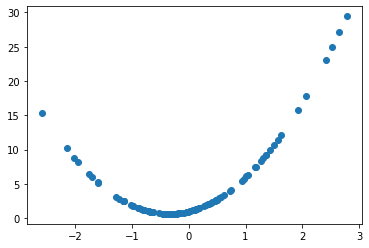

In [55]:
plt.scatter(X, pred)